<a href="https://colab.research.google.com/github/Kol-Chmielarz/2048-NN/blob/main/5_ImageWarping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Every point on this homework must be solved with python code. You will show your code, your results, and make a clear statement of what is you answer. Answer **all** the questions.
1. You will be applying a transformation on a set of points of the following image (18%).
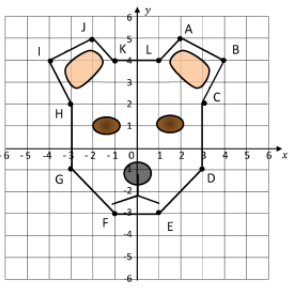
<br>
a) [2%] Find the matrix that represents a rotation of 20 degrees in homogeneous coordinates.<br>
b) [2%] Find the matrix  that represents a translation of 2 in X direction, 1 in y direction degrees in homogeneous coordinates.<br>
c) [2%] Plot the points that form the figure in the cartesian plane.<br>
d) [2%] Perform a rotation of 20 degrees on the points and plot them. <br>
e) [2%] Perform a translation  in x of 2 and a translation in y of 1 over the points previously rotated. Plot the new obtained points.<br>
f) [2%] Find a transform that represents the operation of rotation of 20 degrees followed by a translation. Compare with the points on e) and verify with a plot the match.<br>
g) [2%] Defines a matrix that represents a translation of 2 in x and a translation of 1 in y, followed by a rotation of 20 degrees. Do the transformation over the initial set of points and compare them.<br>
h) [2%] Are the matrices obtained in g) and f) the same? Why? Justify your answer.<br>
i) [2%] Compute the inverse matrix of the transformation obtained in g). Apply such transformation over the set of points obtained in g). Do the new points match the original points? show plots to verify it.<br>



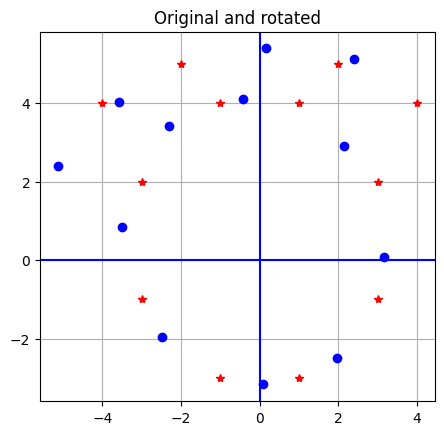

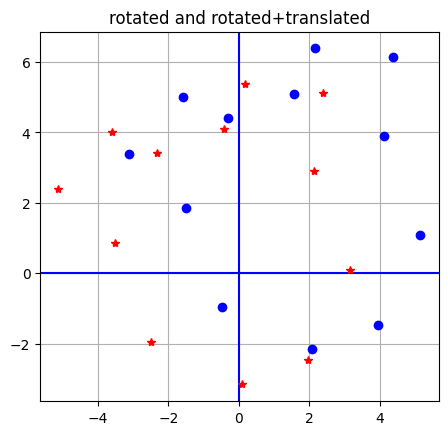

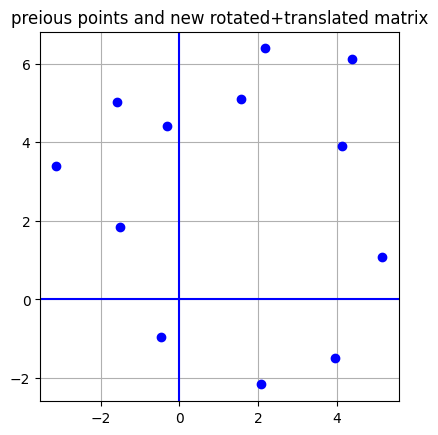

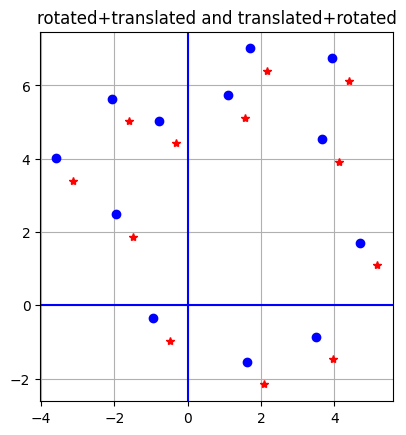

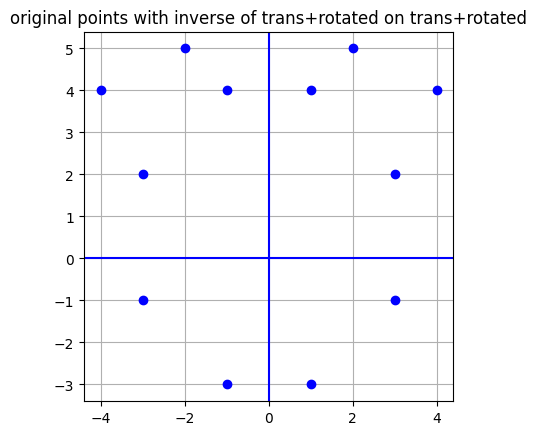

In [30]:
#import needed libraries
import numpy as np
import matplotlib.pyplot as plt

tetadeg =20

#convert to radians
teta=np.pi*tetadeg /180
tx=2
ty=1

# define your points as homogeneuos coordinates (3 coordinates).
points = np.array([[2,5,1],
[4,4,1],
[3,2,1],
[3,-1,1],
[1,-3,1],
[-1,-3,1],
[-3,-1,1],
[-3,2,1],
[-4,4,1],
[-2,5,1],
[-1,4,1],
[1,4,1]])

# Make the points be in columns (you need to transpose them)
points = points.T

# define your rotation matrix here:
R= np.array([[np.cos(teta), -np.sin(teta), 0],
 [np.sin(teta),  np.cos(teta), 0],
 [0,0,1]])
rotPoints = R @ points

# set up your plot
fig, ax = plt.subplots(1)
ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')   #draw x axis
ax.axvline(0, color='blue')   #draw y axis

# Plot original points
ax.plot(points[0,:],points[1,:],'r*')


# do the roation
np.matmul
plt.plot(rotPoints[0,:],rotPoints[1,:],'bo')
plt.title('Original and rotated')
plt.show()


# define your translation matrix here:
T= np.array([[1, 0, 2],[0, 1, 1],[0,0,1]])

rotTransPoints = T @ rotPoints

fig, ax = plt.subplots(1)
ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')   #draw x axis
ax.axvline(0, color='blue')   #draw y axis

# Plot rotated points
ax.plot(rotPoints[0,:],rotPoints[1,:],'r*')


# do the translation
np.matmul
plt.plot(rotTransPoints[0,:],rotTransPoints[1,:],'bo')
plt.title('rotated and rotated+translated')
plt.show()






RT = np.array([[np.cos(teta), -np.sin(teta), 2],
               [np.sin(teta),  np.cos(teta), 1],
               [0,            0,           1]])
RT_points = RT @ points


fig, ax = plt.subplots(1)
ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')   #draw x axis
ax.axvline(0, color='blue')   #draw y axis

# Plot rotated points
ax.plot(rotTransPoints[0,:],rotTransPoints[1,:],'r*')


# do the translation
np.matmul
plt.plot(RT_points[0,:],RT_points[1,:],'bo')
plt.title('preious points and new rotated+translated matrix')
plt.show()

TR = np.array([
    [np.cos(teta), -np.sin(teta), 2*np.cos(teta) - np.sin(teta)],
    [np.sin(teta),  np.cos(teta), 2*np.sin(teta) + np.cos(teta)],
    [0,            0,            1]
])

TR_points = TR @ points


fig, ax = plt.subplots(1)
ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')   #draw x axis
ax.axvline(0, color='blue')   #draw y axis

# Plot rotated points
ax.plot(RT_points[0,:],RT_points[1,:],'r*')


# do the translation
np.matmul
plt.plot(TR_points[0,:],TR_points[1,:],'bo')
plt.title('rotated+translated and translated+rotated')
plt.show()


# Compute translation over your rotated points
#np.matmul
#ax[0].plot(tRotPoints[0,:],tRotPoints[1,:],'g*')

# compute your rotation and translation matrix
#tR = np.matmul
# Transform your points
#tRotPoints3 = np.matmul(tR, points)

#plot points
#ax[1].plot(tRotPoints3[0,:],tRotPoints3[1,:],'y+')
#plt.show()


# complete a) to g)
#h
#No, the order changes the points. Rotating about the origin wont be commututative. The center changes when the translation is made
#inverse
T_inv = np.array([[1, 0, -2],
                  [0, 1, -1],
                  [0, 0, 1]])

R_inv = np.array([[np.cos(teta), np.sin(teta), 0],
                  [-np.sin(teta), np.cos(teta), 0],
                  [0, 0, 1]])



TR_inv = T_inv @ R_inv
TR_inv_points = TR_inv @ TR_points

fig, ax = plt.subplots(1)
ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')   #draw x axis
ax.axvline(0, color='blue')   #draw y axis

# Plot original points
ax.plot(points[0,:],points[1,:],'r*')


# do the inverse translation and shows does match original points
np.matmul
plt.plot(TR_inv_points[0,:],TR_inv_points[1,:],'bo')
plt.title('original points with inverse of trans+rotated on trans+rotated')
plt.show()

2. In this point you will be doing forward warping of an image and will be implementing a nearest neighbor interpolation on the following image. (Available [here](http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/) )<br>
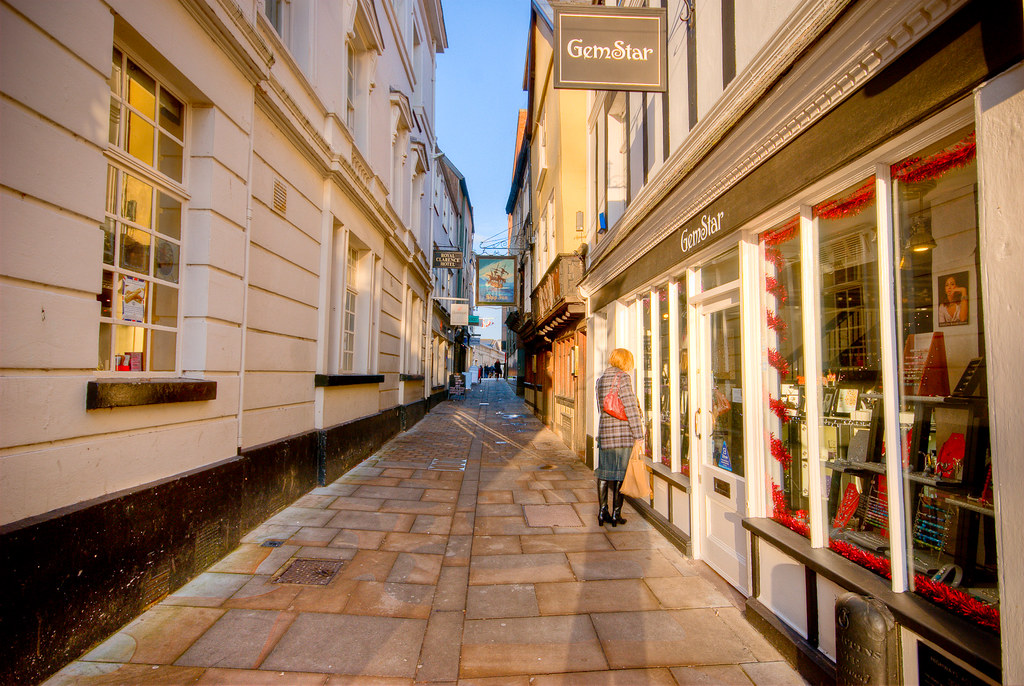
a) [10%] Implement forward warping of the grid points for the homography matrix: <br>
H=[[-2.90978069e+00,  3.54859237e-02,  1.70029144e+03],<br>
  [-6.48857919e-01, -8.36844934e-01,  6.24249500e+02],<br>
 [-2.10617311e-03,  8.27414761e-06,  1.00000000e+00]]<br>
 <br>
 b) [2%]Visualize the obtained warped image in the range from 0 to 1000 in x and y.<br>
 c) [2%]comment about the appereance of the image. Does the image have gaps?<br>
 d) [5%] How the warping looks in regions where outside the [0-1000 pixels in x,y]<br>
 e) [10%] Implement a forward  nearest neighbor interpolation in the warped image<br>
 f) [3%]Visualize the interpolated image. <br>
 g) [2%] comment about the appereance of the interpolated image versus the initially warped image.



File not found: C:/Users/kolchmielarz/Downloads/img2warp.jpg


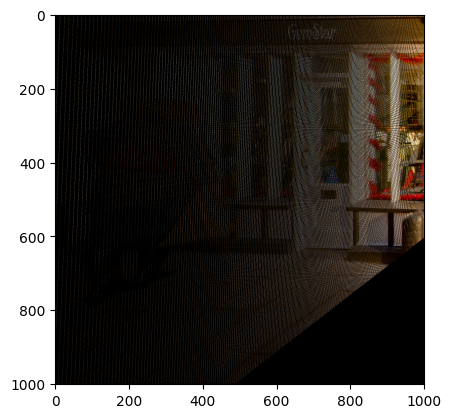

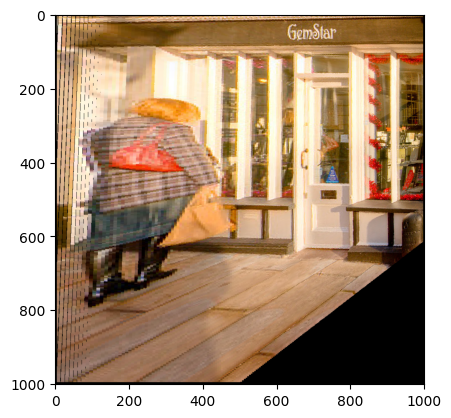

In [3]:
# load an image to warp

# in local machine
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

file_path = 'C:/Users/kolchmielarz/Downloads/img2warp.jpg'  # corrected path if needed
if not os.path.exists(file_path):
    print("File not found:", file_path)
else:
    import cv2
    img = cv2.imread(file_path)
    print("Image loaded with shape:", img.shape)

# image available at: http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/
url = "https://drive.google.com/uc?id=1vqF5se7V70h0mbwVT6t0HAJnJUbXDJri"
from skimage import io
img = io.imread(url)

# the values that can take y
i = np.linspace(0, img.shape[0]-1, img.shape[0]).astype(int)
# the values that can take x
j = np.linspace(0, img.shape[1]-1, img.shape[1]).astype(int)
# combination of values that can take x, and y in a grid
yv, xv = np.meshgrid(i, j)

# nimber of points on the grid
numpoints = xv.ravel().shape[0]

# extract the color channels
r = img[yv.ravel(),xv.ravel(),0]
g = img[yv.ravel(),xv.ravel(),1]
b = img[yv.ravel(),xv.ravel(),2]

# Define Homography matrix
H=np.array([[-2.90978069e+00,  3.54859237e-02,  1.70029144e+03],
 [-6.48857919e-01, -8.36844934e-01,  6.24249500e+02],
 [-2.10617311e-03,  8.27414761e-06,  1.00000000e+00]]
)

# all the values of x coordinates as a row
x_cord = xv.ravel().reshape((1,numpoints))
# all the values of y coordinates as a row
y_cord = yv.ravel().reshape((1,numpoints))

# define the homogeneous coordinates
grid = np.concatenate((x_cord, y_cord, np.ones((1,numpoints))),axis=0)

# transform the grid (your canvas) in the new coordinated determined by the homography defined below
newgrid = np.matmul(H, grid)

# Convert from homogeneous to heterogeneous coordinates
newgridHetero = newgrid[:2,:]   # the x, and y

thethirdcoordinate = newgrid[2,:]
# TO DO : complete the conversion. remember x=X/w
newgridHetero[0,:]=  newgrid[0, :] / thethirdcoordinate
newgridHetero[1,:]= newgrid[1, :] / thethirdcoordinate


# define your new empty canvas (it will have -1 if is not defined)
warped = -np.ones((1001,1001,3)).astype(np.int16)

# Raw approximation. Considering just the integer values
newgrid2= newgridHetero.round().astype(np.int64)

# only consider points that are in your area of interest (0 to 1000)
validsX=np.bitwise_and(newgrid2[0,:]>=0,newgrid2[0,:]<1000)
validsY=np.bitwise_and(newgrid2[1,:]>=0,newgrid2[1,:]<1000)
valids = np.bitwise_and(validsX,validsY)

# assign color to the pixels that are valids
warped[newgrid2[1,valids],newgrid2[0,valids],0]=r[valids]
warped[newgrid2[1,valids],newgrid2[0,valids],1]=g[valids]
warped[newgrid2[1,valids],newgrid2[0,valids],2]=b[valids]
# TO DO: ASSIGN the remaining colors


plt.imshow(warped)
plt.show()

#C. There is gaps, the image was not completely filled. Some pixels were left unmapped from overlapping or truncating the transformed coordinates
#D. Outisde the 0-1000 x and y range, the warped image is clipped. we can expand the region to warp more of the image and see it.
# nearest Neighbor interpolation
# your new canvas
warped2 = np.zeros((1001,1001,3)).astype(np.uint8)
# Area where we look for closest valid assignation
area2check=5

# loop over the valid area of the warped image
for i in range(area2check,warped.shape[0]-area2check):
    for j in range(area2check,warped.shape[1]-area2check):
        # check if the pixel has a valid warped value
        if warped[i,j,0]==-1:  #need to look for neighbor
            distance = area2check*area2check+1  # assign a distance larger than any that can be found in the area to check

            # loop over all the possible neighbors
            for k in range(i-area2check,i+area2check):
                for l in range(j-area2check,j+area2check):
                    distancetested = (abs(k-i)+abs(l-j))  # L1 distance
                    if warped[k,l,0]>=0 and distancetested<distance:    # found a warped point , and it is closest
                        distance=distancetested
                        warped2[i,j]=warped[k,l]
        else:  #assign the valid warping
            warped2[i,j] =warped[i,j]


plt.imshow(warped2)
plt.show()
#g. nearest neighbot is a more complete image, not having gaps as it uses its nearby pixels to fill in. Instead of having gaps though, the picture is jaggedy and seems to have the curves be straighter. It is much more continous in the filled in picxels, but can be argued the picture is changed quite a lot.



3. Write a function of the form (10%):



>> imwarped = warpImage(im,H,limit_coordinates)



where im is the input image to be warped, H is the homography, and limit_coordinates defines the limits (xmin,xmax,ymin,ymax) of the warped image.  


In [4]:
def  warpImage(im,H,limit_coordinates):
  #dimensions and limit coordinates
  h = im.shape[0]
  w = im.shape[1]
  c = im.shape[2]
  xmin, xmax, ymin, ymax = limit_coordinates
  #create grid
  x_vals = np.arange(w)
  y_vals = np.arange(h)
  xv, yv = np.meshgrid(x_vals, y_vals)
#gridpoints and make x and y arrays 1d
  numpoints = xv.size
  xv_flat = xv.ravel().reshape(1, numpoints)
  yv_flat = yv.ravel().reshape(1, numpoints)
  #homogenous coordinatwes
  grid = np.concatenate((xv_flat, yv_flat, np.ones((1, numpoints))), axis=0)
  #Forward Warp
  fwarp = H @ grid

  #2d coordinates
  warped_coords = fwarp[2, :]
  newx = fwarp[0, :] / warped_coords
  newy = fwarp[1, :] / warped_coords

  #clip outside range and round pixels to ints
  newx = np.round(newx).astype(int)
  newy = np.round(newy).astype(int)
  xmin, xmax = limit_coordinates[0], limit_coordinates[1]
  ymin, ymax = limit_coordinates[2], limit_coordinates[3]
  valid_x = np.logical_and(newx >= xmin, newx < xmax)
  valid_y = np.logical_and(newy >= ymin, newy < ymax)
  valid_mask = np.logical_and(valid_x, valid_y)
  newx_valid = newx[valid_mask]
  newy_valid = newy[valid_mask]

  #image output
  imgw = xmax-xmin+1
  imgh = ymax-ymin+1
  im_warped = np.zeros((imgh, imgw, c)) #init canvas

  im_flat = im.reshape(-1, c) #flatten, easier handling
  valid_indices = np.where((newx >= xmin) & (newx < xmax) & (newy >= ymin) & (newy < ymax))[0]
  colors = im_flat[valid_indices] #color from orig image
#iterate over warped coords and assign color
  for idx in range(len(valid_indices)):
        x_pos = newx_valid[idx] - xmin
        y_pos = newy_valid[idx] - ymin
        pixel_color = colors[idx]
        im_warped[y_pos, x_pos, :] = colors[idx]
        im_warped[y_pos, x_pos] = pixel_color

  return im_warped


  # your function goes here

<br>

4. **Recover Homographies (10%)**.  Before you can warp your images into alignment, you need to recover the parameters of the transformation between each pair of images.  
In our case, the transformation is a homography: $p’=Hp$,
where:
* $(p’,p)$ are pairs of corresponding points taken from the two images.  
* $H$ is a 3x3 matrix with 8 degrees of freedom (lower right corner is a scaling factor and can be set to 1;  $h_{2,2}  = 1$). <br>

Considering the matrix form below, <b>obtain an expression of the form $Ax=b$ if $h_{22} =1$ </b><br>

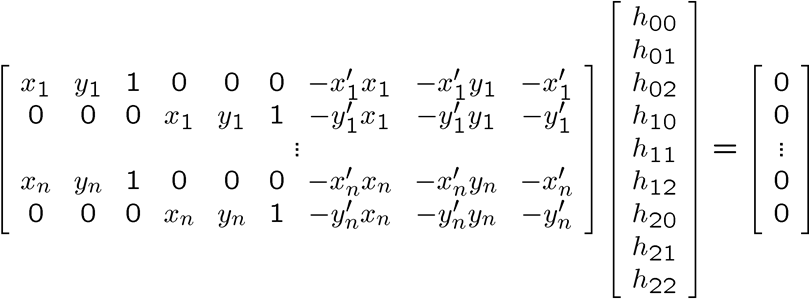
<br>
<b>Tip: if $h_{2,2}$ is 1, you can have 1 parameter less in the h vector and 1 column less in the matrix; b will not be zero anymore</b>
<br>
<br>
5. Write a python function using the expression obtained in the previous point with the following prototype (10%): <br>

>> H = computeH(im1_pts,im2_pts) <br>

> where im1_pts and im2_pts are n-by-2 matrices holding the (x,y) locations of n point correspondences from the two images and H is the recovered 3x3 homography matrix.  <br>
<br>






6. Test your functions. Select 4 points manually from the image in point 2. The cooresponding points will be your corner points in the new warped image (origin, top right, bottom right, bottom left). <br>
a) Compute a new homography matrix using function created in 5. (10%).<br>
b) Visualize the warped image using the function created in 3. (8%).<br>
<br>

**BONUS [50%] Stackable with other homeworks if your score overpass 100%**:
Write a function of the form:


>> imwarped = warpImage(im1,im2,H)



where im1 and im2 are the input images to be warped and H is the homography that wrap im1 to im2.  

Use the method described in class. you need forward and inverse warping (but remember that for inverse warping you will need to compute H in the right “direction”).

Try to write the whole function without any loops. One thing you need to pay attention to is the size of the resulting image (you can predict the bounding box by piping the four corners of the image through H, or use extra input parameters).  Also pay attention to how you mark pixels which don’t have any values.

Utilizes bilinear interpolation to approximate non integer pixel positions.



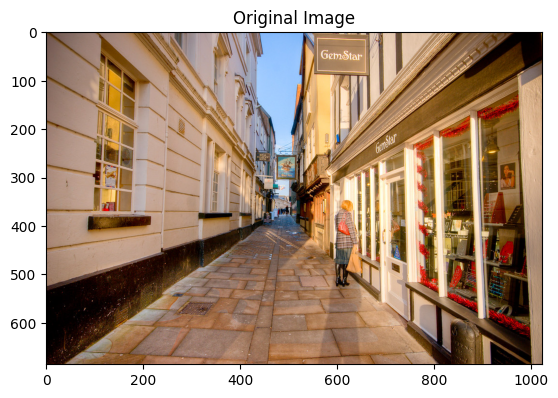

Computed Homography:
 [[ 7.22021661e-01 -8.12066343e-13 -8.88086643e+01]
 [ 9.91762228e-13  1.56862745e+00 -2.96470588e+02]
 [-8.57170238e-15  2.45788633e-15  1.00000000e+00]]


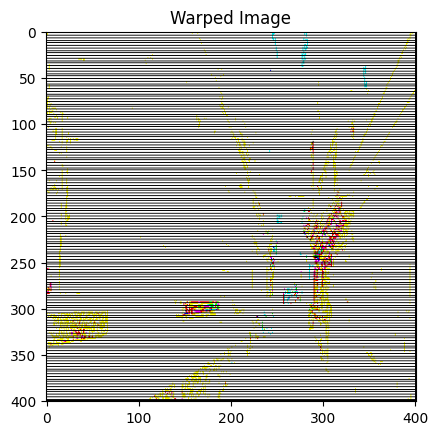

In [10]:
#4. Ah = 0, Ax=b,
#x is 8 element vector h not h22
#A is 2n*8 matrix
#b is 2n vector all 0s except h22
#H expression can be
#H = [h00 h01 h02
 #    h10 h11 h12
#     h20 h21 1]

#5.
def computeH(im1_pts,im2_pts):
  n = im1_pts.shape[0] #num points in image
  A = np.zeros((2*n, 8)) #initialize
  b = np.zeros((2*n,))
  for i in range(n):
    x1 = im1_pts[i,0]
    y1 = im1_pts[i,1]
    x2 = im2_pts[i,0]
    y2 = im2_pts[i,1]

    #xcoord equation
    A[2*i, :] = [x1, y1, 1, 0, 0, 0, -x1 * x2, -y1 * x2]
    b[2*i] = x2
    #ycoord equation
    A[2*i+1, :] = [0, 0, 0, x1, y1, 1, -x1 * y2, -y1 * y2]
    b[2*i+1] = y2

  #leastsquares for ax=b
  x_params, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

    # Construct the 3x3 homography matrix with h22 = 1
  H = np.array([
       [x_params[0], x_params[1], x_params[2]],
       [x_params[3], x_params[4], x_params[5]],
       [x_params[6], x_params[7], 1.0]])

  return H

#6
url = "https://drive.google.com/uc?id=1vqF5se7V70h0mbwVT6t0HAJnJUbXDJri"
im = io.imread(url)
plt.imshow(im)
plt.title("Original Image")
plt.show()
im1_pts = np.array([
    [123, 189],
    [677, 189],
    [677, 444],
    [123, 444]
])

im2_pts = np.array([
    [0, 0],
    [400, 0],
    [400, 400],
    [0, 400]
])

H = computeH(im1_pts, im2_pts)
print("Computed Homography:\n", H)
limit_coordinates = (0, 400, 0, 400)
im_warped = warpImage(im, H, limit_coordinates)
plt.imshow(im_warped)
plt.title("Warped Image")
plt.show()


